## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 60)

In [2]:
dummy = pd.read_csv('../datasets/HDB_benchmark.csv')
dummy.shape

(149805, 9)

In [3]:
dummy.dtypes

max_floor_lvl            int64
3room_sold               int64
floor_area_sqm         float64
5room_sold               int64
exec_sold                int64
mid                      int64
lease_commence_date      int64
resale_price           float64
town                    object
dtype: object

In [4]:
dummy.isnull().sum()

max_floor_lvl          0
3room_sold             0
floor_area_sqm         0
5room_sold             0
exec_sold              0
mid                    0
lease_commence_date    0
resale_price           0
town                   0
dtype: int64

In [5]:
dummy1 = pd.read_csv('../datasets/HDB_FE.csv')
dummy1.shape

(149805, 18)

In [6]:
dummy1.dtypes

remaining_lease              int64
max_floor_lvl                int64
3room_sold                   int64
floor_area_sqm             float64
storey_range                 int64
5room_sold                   int64
exec_sold                    int64
Mature_Estate                int64
public_tpt_dist            float64
amenities_within_2km       float64
resale_price               float64
town                        object
Mall_Nearest_Distance      float64
Hawker_Nearest_Distance    float64
commercial                   int64
total_dwelling_units         int64
2room_sold                   int64
full_flat_type              object
dtype: object

In [7]:
dummy1.isnull().sum()

remaining_lease            0
max_floor_lvl              0
3room_sold                 0
floor_area_sqm             0
storey_range               0
5room_sold                 0
exec_sold                  0
Mature_Estate              0
public_tpt_dist            0
amenities_within_2km       0
resale_price               0
town                       0
Mall_Nearest_Distance      0
Hawker_Nearest_Distance    0
commercial                 0
total_dwelling_units       0
2room_sold                 0
full_flat_type             0
dtype: int64

# Model 1: Using default features (without feature engineering)

In [8]:
#one-hot encode selected categorial features
ohe = pd.get_dummies(dummy[['town']], drop_first=True)
df = pd.concat([dummy, ohe], axis=1)
df.drop(columns=['town'], inplace=True)

## Data Modelling

In [9]:
X = df.drop(columns=['resale_price'])
y = df['resale_price']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [11]:
#perform scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.fit_transform(X_val)

### *Model: Linear Regression*

In [12]:
lr = LinearRegression()

In [13]:
#cross validation for r2 score
lr_score = cross_val_score(lr, X_train, y_train, cv=5)
lr_score.mean()

0.8226196559299706

In [14]:
#cross validation for RMSE
lr_rmse = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
lr_rmse.mean()

-60334.0075346246

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
#r2 score for X train and y train
lr.score(X_train, y_train)

0.8227770591703996

In [17]:
#r2 score for X val and y val
lr.score(X_val, y_val)

0.8197352417486848

In [18]:
#RMSE of Linear regression predict on test set
lr_pred = lr.predict(X_val)
mean_squared_error(y_val, lr_pred, squared=False)

60735.66720227129

In [19]:
lr.intercept_

-6378434.796243029

In [20]:
pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)

town_BUKIT TIMAH        180332.532166
town_MARINE PARADE      118589.046522
town_CENTRAL AREA       102699.075405
town_QUEENSTOWN          81832.086717
town_BISHAN              79607.441924
town_BUKIT MERAH         77684.720208
town_KALLANG/WHAMPOA     41191.446350
town_CLEMENTI            33815.904723
town_TOA PAYOH           27325.688189
town_GEYLANG             24986.360576
floor_area_sqm            3929.979285
max_floor_lvl             3670.220061
mid                       3400.914491
lease_commence_date       3224.007040
exec_sold                  420.538853
5room_sold                 -60.071869
3room_sold                 -77.261123
town_SERANGOON           -1131.052496
town_BEDOK              -15467.368182
town_TAMPINES           -38353.321866
town_JURONG EAST        -67509.174577
town_HOUGANG            -68931.379271
town_BUKIT BATOK        -78440.333301
town_YISHUN             -91427.149790
town_PASIR RIS         -100253.311383
town_PUNGGOL           -110211.964538
town_JURONG 

### *Regularisation Model: Lasso Regression*

In [21]:
#perform scaling for ridge and lasso regularization
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.fit_transform(X_val)

In [22]:
lasso = LassoCV(n_alphas=500)

In [23]:
#cross validation for r2 score
lasso_score = cross_val_score(lasso, X_train_ss, y_train, cv=10)
lasso_score.mean()

0.822556214582022

In [24]:
#cross validation for RMSE
lasso_rmse = cross_val_score(lasso, X_train_ss, y_train, cv=10, scoring='neg_root_mean_squared_error')
lasso_rmse.mean()

-60339.039551114976

In [25]:
lasso.fit(X_train_ss, y_train)

LassoCV(n_alphas=500)

In [26]:
#r2 score for X train and y train
lasso.score(X_train_ss, y_train)

0.8227251993893552

In [27]:
#r2 score for X val and y val
lasso.score(X_val_ss, y_val)

0.8196113836696037

In [28]:
#RMSE of Lasso Regluarization predict on test set
lasso_pred = lasso.predict(X_val_ss)
mean_squared_error(y_val, lasso_pred, squared=False)

60756.5290485137

In [29]:
#Lasso parameters
params = {"n_alphas":[200,300,400,500]}

#instanstiate gridsearch
model = GridSearchCV(lasso, params, cv=5)

In [30]:
#fit gridsearch 
model.fit(X_train_ss, y_train)

#get best parameters
model.best_params_

{'n_alphas': 200}

In [31]:
model.score(X_val_ss, y_val)

0.8196113836696037

In [32]:
lasso.alpha_

94.04918109526236

In [33]:
pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

floor_area_sqm          95748.011448
lease_commence_date     38093.753942
max_floor_lvl           23151.213598
mid                     18533.535354
town_BUKIT MERAH        15521.222813
town_QUEENSTOWN         13687.612531
town_BISHAN             11414.435800
town_MARINE PARADE       9747.115626
town_CENTRAL AREA        9444.192547
town_BUKIT TIMAH         8982.436875
exec_sold                8058.672735
town_KALLANG/WHAMPOA     7294.968506
town_CLEMENTI            5591.352146
town_TOA PAYOH           5231.760609
town_GEYLANG             4445.551761
town_SERANGOON            308.766053
5room_sold              -1841.587456
town_BEDOK              -2776.364262
3room_sold              -5174.161977
town_TAMPINES           -8664.225448
town_JURONG EAST        -9433.849872
town_BUKIT BATOK       -14085.823108
town_HOUGANG           -14123.557155
town_PASIR RIS         -16691.374843
town_YISHUN            -21746.953794
town_PUNGGOL           -23252.740715
town_BUKIT PANJANG     -24861.865831
t

### *Regularisation Model: Ridge Regression*

In [34]:
ridge = RidgeCV(alphas=np.logspace(0.1,10,200))

In [35]:
#cross validation for r2 score
ridge_score = cross_val_score(ridge, X_train_ss, y_train, cv=10)
ridge_score.mean()

0.8226074266329448

In [36]:
#cross validation for RMSE
ridge_rmse = cross_val_score(ridge, X_train_ss, y_train, cv=10, scoring='neg_root_mean_squared_error')
ridge_rmse.mean()

-60330.199651028066

In [37]:
ridge.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.41172057e+00, 1.58306041e+00, 1.77519568e+00,
       1.99065031e+00, 2.23225456e+00, 2.50318220e+00, 2.80699220e+00,
       3.14767547e+00, 3.52970730e+00, 3.95810615e+00, 4.43849956e+00,
       4.97719808e+00, 5.58127817e+00, 6.25867517e+00, 7.01828751e+00,
       7.87009364e+00, 8.82528305e+00, 9.89640333e+00, 1.10975250e+01,
       1.24444261e+01, 1.39548000e+0...
       7.17428945e+08, 8.04502945e+08, 9.02145074e+08, 1.01163798e+09,
       1.13441999e+09, 1.27210398e+09, 1.42649862e+09, 1.59963206e+09,
       1.79377862e+09, 2.01148866e+09, 2.25562205e+09, 2.52938580e+09,
       2.83637611e+09, 3.18062569e+09, 3.56665668e+09, 3.99954005e+09,
       4.48496227e+09, 5.02929995e+09, 5.63970362e+09, 6.32419169e+09,
       7.09175574e+09, 7.95247866e+09, 8.91766711e+09, 1.00000000e+10]))

In [38]:
#r2 score for X train and y train
ridge.score(X_train_ss, y_train)

0.8227770583440377

In [39]:
#r2 score for X val and y val
ridge.score(X_val_ss, y_val)

0.8196432557804857

In [40]:
ridge_pred = ridge.predict(X_val_ss)

#RMSE score for ridge regression
mean_squared_error(y_val, ridge_pred, squared=False)

60751.16140278053

In [41]:
#Coefficient weights for selected features passed into ridge regression
pd.Series(ridge.coef_, index=X.columns).sort_values(ascending=False)

floor_area_sqm          96009.269166
lease_commence_date     38839.056490
max_floor_lvl           22726.357456
mid                     18596.943943
town_BUKIT MERAH        14992.665900
town_QUEENSTOWN         13313.129482
town_BISHAN             10977.984339
town_MARINE PARADE       9631.874432
town_CENTRAL AREA        9290.898922
town_BUKIT TIMAH         8895.281613
exec_sold                8078.338039
town_KALLANG/WHAMPOA     6873.817669
town_CLEMENTI            5188.310144
town_TOA PAYOH           4808.700187
town_GEYLANG             4009.798965
town_SERANGOON           -158.371342
5room_sold              -2007.380461
town_BEDOK              -3658.328004
3room_sold              -5312.656380
town_TAMPINES           -9810.660089
town_JURONG EAST       -10057.814831
town_BUKIT BATOK       -14898.878477
town_HOUGANG           -15103.189348
town_PASIR RIS         -17573.721872
town_YISHUN            -22852.111141
town_PUNGGOL           -24421.138984
town_BUKIT PANJANG     -25756.345894
t

In [42]:
ridge.alpha_

1.2589254117941673

### Model 1 Evaluation: Default features

| **Model** | **R2 Train Score** | **R2 Test Score** | **RMSE** | **Features** |
| --- | ---| ---| ---| ---|
| Linear | 0.823 | 0.819 | 60756 | 32 |
| Ridge | 0.823| 0.819 | 60751 | 32
| Lasso | 0.820 | 0.820 | 60756 | 32 |

- From the above table, we can observe that there is negligible difference in terms of root mean sqaure error (RMSE) between all 3 models just by passing in default features. We will be using the Ridge model with RMSE of 60751 as bench mark against our 2nd model, as the amount of residual errors can still be further reduced

## Model 2: Default and Engineered features

In [43]:
ohe = pd.get_dummies(dummy1[['town', 'full_flat_type']], drop_first=True)
df = pd.concat([dummy1, ohe], axis=1)
df.drop(columns=['town', 'full_flat_type'], inplace=True)

### Data Modelling

In [44]:
X = df.drop(columns=['resale_price'])
y = df['resale_price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
#perform scaling for ridge and lasso regularization
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

### *Model: Linear Regression*

In [47]:
lr = LinearRegression()

In [48]:
#cross validation for r2 score
lr_score = cross_val_score(lr, X_train_ss, y_train, cv=5)
lr_score.mean()

-5.651043048708932e+22

In [49]:
#cross validation for RMSE
lr_rmse = cross_val_score(lr, X_train_ss, y_train, cv=5, scoring='neg_root_mean_squared_error')
lr_rmse.mean()

-1.5274469229002186e+16

In [50]:
lr.fit(X_train_ss, y_train)

LinearRegression()

In [51]:
#r2 score for X train and y train
lr.score(X_train_ss, y_train)

0.8843420688220129

In [52]:
#r2 score for X test and y test
lr.score(X_test_ss, y_test)

-7.025033160343851e+16

In [53]:
#RMSE of Linear regression predict on test set
lr_pred = lr.predict(X_test_ss)
mean_squared_error(y_test, lr_pred, squared=False)

37915132739986.88

In [54]:
lr.intercept_

448793.0834424545

In [55]:
pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)

Mature_Estate              1.942000e+15
town_JURONG WEST           1.038629e+15
town_WOODLANDS             1.032330e+15
town_SENGKANG              1.016202e+15
town_YISHUN                9.775678e+14
                               ...     
Mall_Nearest_Distance     -5.408312e+03
town_TAMPINES             -7.211875e+03
town_PASIR RIS            -9.696781e+03
Hawker_Nearest_Distance   -1.868659e+04
public_tpt_dist           -2.339299e+04
Length: 82, dtype: float64

### *Regularisation Model: Lasso Regression*

In [56]:
#perform scaling for ridge and lasso regularization
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [57]:
lasso = LassoCV(n_alphas=200)

In [58]:
#cross validation for r2 score
lasso_score = cross_val_score(lasso, X_train_ss, y_train, cv=10)
lasso_score.mean()

0.8840255630258019

In [59]:
#cross validation for RMSE
lasso_rmse = cross_val_score(lasso, X_train_ss, y_train, cv=10, scoring='neg_root_mean_squared_error')
lasso_rmse.mean()

-48780.77329777597

In [60]:
lasso.fit(X_train_ss, y_train)

LassoCV(n_alphas=200)

In [61]:
#r2 score for X train and y train
lasso.score(X_train_ss, y_train)

0.8842725101127882

In [62]:
#r2 score for X val and y val
lasso.score(X_test_ss, y_test)

0.8816887316672453

In [63]:
#RMSE of Lasso Regularization predict on test set
lasso_pred = lasso.predict(X_train_ss)
mean_squared_error(y_train, lasso_pred, squared=False)

48737.202241862884

In [64]:
lasso.alpha_

94.04918109526236

In [65]:
pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

floor_area_sqm             89073.121327
remaining_lease            49120.271427
Mature_Estate              37722.832553
max_floor_lvl              20192.324895
storey_range               18396.429381
                               ...     
town_SEMBAWANG             -9559.972326
town_PASIR RIS             -9672.783668
town_WOODLANDS            -16750.729106
Hawker_Nearest_Distance   -18255.611604
public_tpt_dist           -23345.823193
Length: 82, dtype: float64

### *Regularisation Model: Ridge Regression*

In [66]:
ridge = RidgeCV(alphas=np.logspace(0.1,10,200))

In [67]:
#cross validation for r2 score
ridge_score = cross_val_score(ridge, X_train_ss, y_train, cv=10)
ridge_score.mean()

0.8840806989298912

In [68]:
#cross validation for RMSE
ridge_rmse = cross_val_score(ridge, X_train_ss, y_train, cv=10, scoring='neg_root_mean_squared_error')
ridge_rmse.mean()

-48769.0269070464

In [69]:
ridge.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.41172057e+00, 1.58306041e+00, 1.77519568e+00,
       1.99065031e+00, 2.23225456e+00, 2.50318220e+00, 2.80699220e+00,
       3.14767547e+00, 3.52970730e+00, 3.95810615e+00, 4.43849956e+00,
       4.97719808e+00, 5.58127817e+00, 6.25867517e+00, 7.01828751e+00,
       7.87009364e+00, 8.82528305e+00, 9.89640333e+00, 1.10975250e+01,
       1.24444261e+01, 1.39548000e+0...
       7.17428945e+08, 8.04502945e+08, 9.02145074e+08, 1.01163798e+09,
       1.13441999e+09, 1.27210398e+09, 1.42649862e+09, 1.59963206e+09,
       1.79377862e+09, 2.01148866e+09, 2.25562205e+09, 2.52938580e+09,
       2.83637611e+09, 3.18062569e+09, 3.56665668e+09, 3.99954005e+09,
       4.48496227e+09, 5.02929995e+09, 5.63970362e+09, 6.32419169e+09,
       7.09175574e+09, 7.95247866e+09, 8.91766711e+09, 1.00000000e+10]))

In [70]:
#r2 score for X train and y train
ridge.score(X_train_ss, y_train)

0.8843421141963289

In [71]:
#r2 score for X val and y val
ridge.score(X_test_ss, y_test)

0.8817160766152916

In [72]:
ridge_pred = ridge.predict(X_train_ss)

#RMSE score for ridge regression
mean_squared_error(y_train, ridge_pred, squared=False)

48722.54358760745

In [73]:
#Coefficient weights for selected features passed into ridge regression
pd.Series(ridge.coef_, index=X.columns).sort_values(ascending=False)

floor_area_sqm             86868.788110
remaining_lease            49035.180191
Mature_Estate              28389.241310
max_floor_lvl              19892.040290
storey_range               18448.085542
                               ...     
town_CHOA CHU KANG         -9858.051717
town_SEMBAWANG            -12486.739296
Hawker_Nearest_Distance   -18686.597330
town_WOODLANDS            -21669.699445
public_tpt_dist           -23392.540340
Length: 82, dtype: float64

In [74]:
ridge.alpha_

1.7751956750997056

## Model 2 Evaluation: Default + Feature engineering


**Before implementing new features**:

| **Model** | **R2 Train Score** | **R2 Test Score** | **RMSE** | **Features** |
| --- | ---| ---| ---| ---|
| Linear | 0.823 | 0.819 | 60756 | 32 |
| Ridge | 0.823| 0.819 | 60751 | 32
| Lasso | 0.820 | 0.820 | 60756 | 32 |






**After implementing new features**:


| **Model** | **R2 Train Score** | **R2 Test Score** | **RMSE** | **Features** |
| --- | ---| ---| ---| ---|
| Linear | 0.884 | -7.03e+16 | 37915132739986 | 68 |
| Ridge | 0.884| 0.882 | 48722 | 68
| Lasso | 0.884 | 0.882 | 48737 | 68 |

- By comparing the RMSE scores from the above 2 tables, we can see that the linear regression model is overfitting upon doubling the number of features by approximately twice the original amount. Instead, the ridge and lasso regression did a good job in helping to shrink/zero out features that will not be useful to our linear regression model. We have successfully managed to reduce the RMSE by approximately **SGD12000** in value on our model

In [75]:
#Rank top 10 positive coefficient features
df0 = pd.DataFrame({'Col1': lasso.coef_, 'Col2': X.columns})
df0.sort_values(by='Col1', ascending=False).head(15)

,Col1,Col2
3,89073.121327,floor_area_sqm
0,49120.271427,remaining_lease
7,37722.832553,Mature_Estate
1,20192.324895,max_floor_lvl
4,18396.429381,storey_range
29,15224.162957,town_MARINE PARADE
16,12987.301798,town_BISHAN
18,12429.712315,town_BUKIT MERAH
78,12155.767254,full_flat_type_EXECUTIVE Maisonette
32,11980.273831,town_QUEENSTOWN


In [76]:
#Rank top 10 negative coefficient features
df0.sort_values(by='Col1', ascending=False).tail(15)

,Col1,Col2
15,-3646.485228,town_BEDOK
14,-3782.376343,2room_sold
5,-3825.554912,5room_sold
13,-3957.220410,total_dwelling_units
27,-4381.771796,town_JURONG WEST
10,-5153.776410,Mall_Nearest_Distance
19,-5629.483500,town_BUKIT PANJANG
22,-6306.874572,town_CHOA CHU KANG
57,-6505.949556,full_flat_type_4 ROOM Model A
36,-7324.968742,town_TAMPINES


In [77]:
#combine both top10 positive and negative coefficient features
df0 = pd.concat([df0.sort_values(by='Col1', ascending=False).head(15), 
                 df0.sort_values(by='Col1', ascending=False).tail(15)], axis=0)
features = [i for i in df0['Col2']]

In [78]:
new_df = df[features]

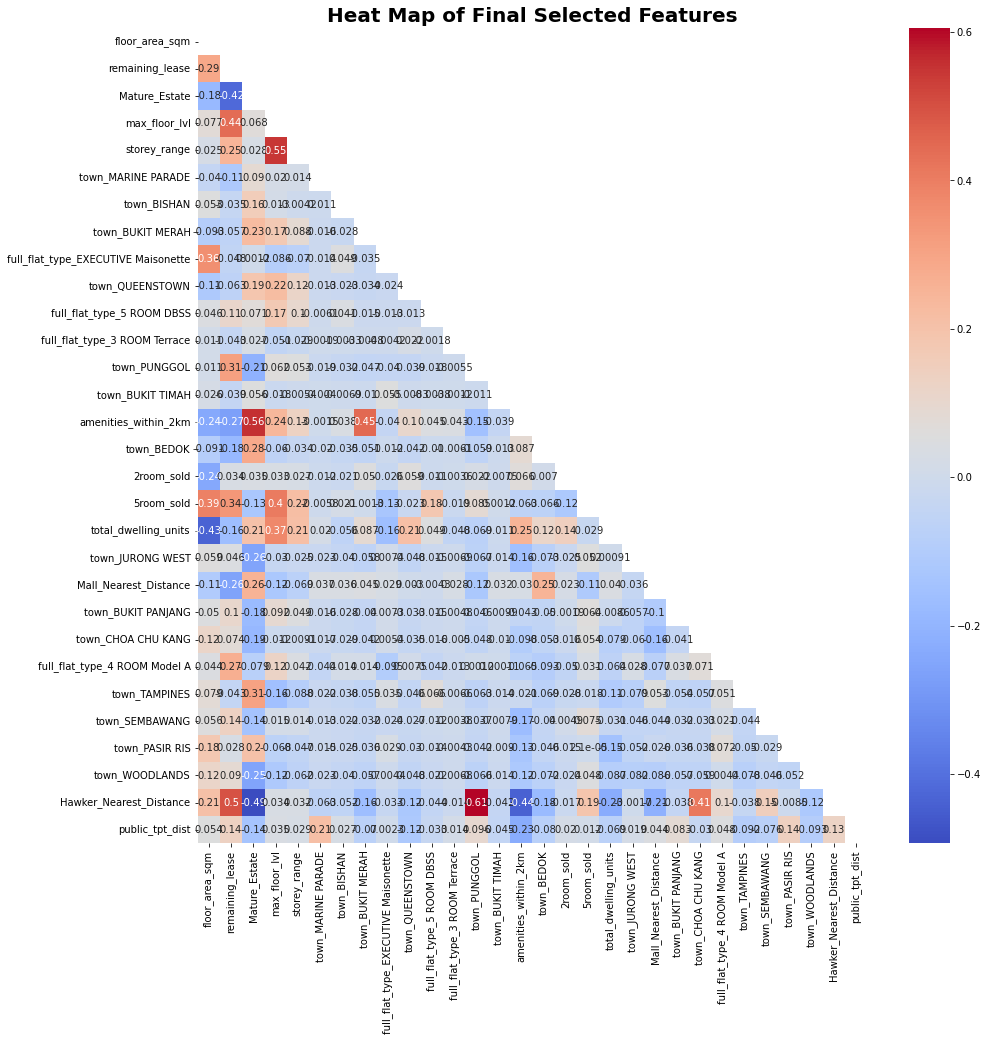

In [80]:
matrix = np.triu(new_df.corr())

plt.figure(figsize=(15, 15))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', mask=matrix)
plt.title('Heat Map of Final Selected Features',size=20, fontweight="bold")
plt.show()

- By setting our multicolinearity threshold to 0.7 higher, we observed that the selected features to be passed in for prediction have correlation values of less than 0.7. From this, we can sfaely conclude that these features can be used our predictions in the final Linear Regression model

## Final Model (Linear Regression)

In [81]:
X1 = df[features]
y1 = df['resale_price']

In [82]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [83]:
ss = StandardScaler()
X1_train_ss = ss.fit_transform(X1_train)
X1_test_ss = ss.fit_transform(X1_test)

In [84]:
lr.fit(X1_train_ss, y1_train)

LinearRegression()

In [85]:
# R2 score of train x and train y
lr.score(X1_train_ss, y1_train)

0.8717257284282156

In [86]:
# R2 score of train x and train y
lr.score(X1_test_ss, y1_test)

0.8688029158812944

In [87]:
#predict and score the RMSE
lr_pred = lr.predict(X1_test_ss)
mean_squared_error(y1_test, lr_pred, squared=False)

51814.40112621594

In [88]:
pd.Series(lr.coef_, index=X1.columns).sort_values(ascending=False)

floor_area_sqm                         96373.784041
remaining_lease                        45978.927121
Mature_Estate                          40031.940183
max_floor_lvl                          26808.980845
storey_range                           18447.347585
town_MARINE PARADE                     14013.295687
town_BISHAN                            10197.545509
full_flat_type_5 ROOM DBSS              9524.298831
full_flat_type_3 ROOM Terrace           9267.150492
town_BUKIT MERAH                        8492.693198
full_flat_type_EXECUTIVE Maisonette     7997.952733
town_QUEENSTOWN                         7910.656010
town_BUKIT TIMAH                        7337.926489
town_PUNGGOL                            7289.207473
amenities_within_2km                    4968.143368
2room_sold                             -3740.980812
Mall_Nearest_Distance                  -4298.648814
5room_sold                             -5715.228838
total_dwelling_units                   -6694.764972
full_flat_ty

## Final Model for Predictions


| **Model** | **R2 Train Score** | **R2 Test Score** | **RMSE** | **Features** |
| --- | ---| ---| ---| ---|
| Linear (final) | 0.871 | 0.869 | 51814 | 30 |
| Ridge (benchmark) | 0.823 | 0.819 | 60751 | 32 |

The final model that we will be passing in for predictions will consist of the top 30 features among the previously generated 68 features. We have successfully obtained a reduction of approx 9000 in RMSE by maintaining a relatively same amount of features that was passed into the benchmark model previously

In [89]:
residual = lr_pred - y1_test

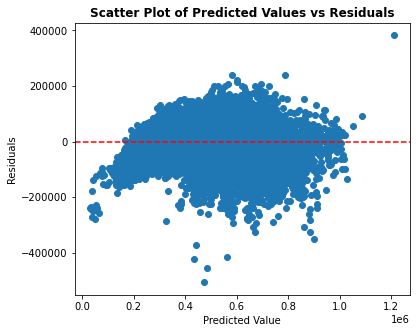

In [90]:
# figure size
plt.figure(figsize=(6,5))

# plot scatterplot
plt.scatter(lr_pred, residual);

plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Predicted Values vs Residuals', fontweight='bold')
plt.axhline(0, color='red', linestyle='--')
plt.show()

From the above residual plot, we can safely conclude that the predicted data is homoscedastic with no huge variances in its distribution

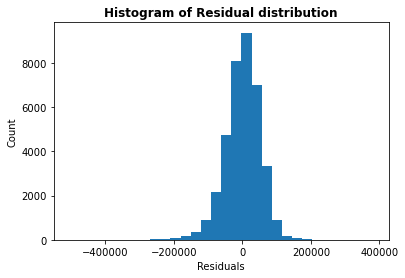

In [91]:
plt.hist(residual, bins=30);

plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residual distribution', fontweight='bold')
plt.show()

The above histogram plot justifies our hypothesis that the distribution is approximately normal, as our predictor variables are able to predict the resale price well

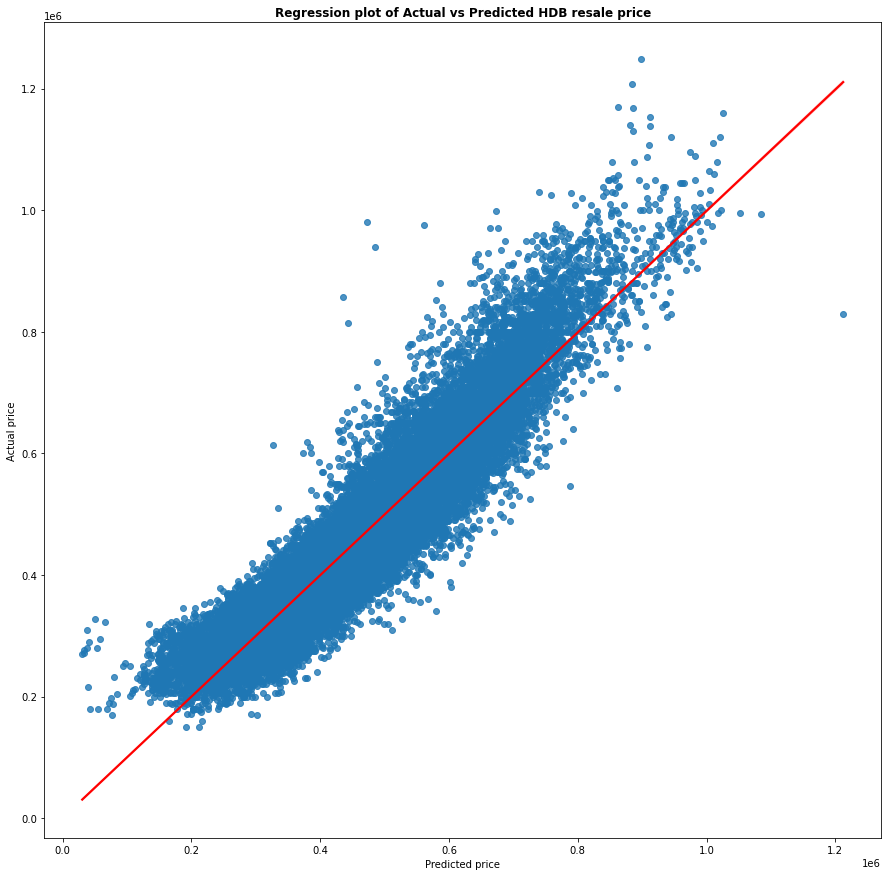

In [92]:
plt.figure(figsize=(15, 15))
sns.regplot(data=X_train_ss, y=y1_test, x=lr_pred, line_kws={'color': 'red'});
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Regression plot of Actual vs Predicted HDB resale price', fontweight='bold')
plt.show()

The relationship between the predicted price against the actual price shows a linear trend where the data points are generally falling along the linear line

## Hypothesis Testing

We conduct hypothesis testing using the t-test statistic to test if the selected features will have an impact on the model's output
Our assumption for the null hypothesis is to assume that selected features are statistically similar where they do not have affect the model's output. In order to verify this, we have to check if the p value is greater than 0.05

In [93]:
import statsmodels.api as sm


X_stat = sm.add_constant(X1, prepend=True)
model = sm.OLS(y1, X_stat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.371e+04
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:48:57   Log-Likelihood:            -1.8377e+06
No. Observations:              149805   AIC:                         3.675e+06
Df Residuals:                  149774   BIC:                         3.676e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -2.407e+05   1559.747   -154.346      0.000   -2.44e+05   -2.38e+05
floor_area_sqm                       3948.1345      7.941    497.155      0.000    3932.569    3963.700
remaining_lease                      3880.7933     18.265    212.466      0.000    3844.993    3916.593
Mature_Estate                        7.991e+04    543.152    147.124      0.000    7.88e+04     8.1e+04
max_floor_lvl                        4309.7354     37.636    114.511      0.000    4235.970    4383.501
storey_range                         6155.4763     52.984    116.176      0.000    6051.629    6259.324
town_MARINE PARADE                   1.732e+05   1757.440     98.561      0.000     1.7e+05    1.77e+05
town_BISHAN                          7.355e+04   1030.323     71.387      0.000    7.15e+04    7.56e+04
town_BUKIT MERAH                     4.389e+04    790.232     55.547      0.000    4.23e+04    4.54e+04
full_flat_type_EXECUTIVE Maisonette  4.722e+04    911.659     51.800      0.000    4.54e+04     4.9e+04
town_QUEENSTOWN                      4.895e+04    901.595     54.293      0.000    4.72e+04    5.07e+04
full_flat_type_5 ROOM DBSS           1.269e+05   1832.689     69.256      0.000    1.23e+05    1.31e+05
full_flat_type_3 ROOM Terrace        3.866e+05   5586.673     69.194      0.000    3.76e+05    3.98e+05
town_PUNGGOL                         3.368e+04    900.417     37.410      0.000    3.19e+04    3.54e+04
town_BUKIT TIMAH                      1.51e+05   2731.734     55.271      0.000    1.46e+05    1.56e+05
amenities_within_2km                  882.2676     36.085     24.450      0.000     811.542     952.993
town_BEDOK                           -3.29e+04    646.491    -50.888      0.000   -3.42e+04   -3.16e+04
2room_sold                           -325.2404     11.942    -27.235      0.000    -348.646    -301.835
5room_sold                           -171.6195      5.071    -33.842      0.000    -181.559    -161.680
total_dwelling_units                 -116.1801      3.050    -38.095      0.000    -122.158    -110.203
town_JURONG WEST                    -3.226e+04    557.053    -57.904      0.000   -3.33e+04   -3.12e+04
Mall_Nearest_Distance                 -11.3546      0.400    -28.370      0.000     -12.139     -10.570
town_BUKIT PANJANG                  -4.777e+04    750.127    -63.681      0.000   -4.92e+04   -4.63e+04
town_CHOA CHU KANG                  -4.289e+04    862.609    -49.716      0.000   -4.46e+04   -4.12e+04
full_flat_type_4 ROOM Model A       -1.781e+04    336.310    -52.958      0.000   -1.85e+04   -1.72e+04
town_TAMPINES                       -4.778e+04    663.569    -72.004      0.000   -4.91e+04   -4.65e+04
town_SEMBAWANG                      -7.511e+04    922.395    -81.42

From the results in the summary table, we can assume that all of the selected features are statistifically significant where they will affect the model's output, as their p-value is lower than 0.05. Hence we reject the null hypothesis

## Coefficient ranking and Analysis

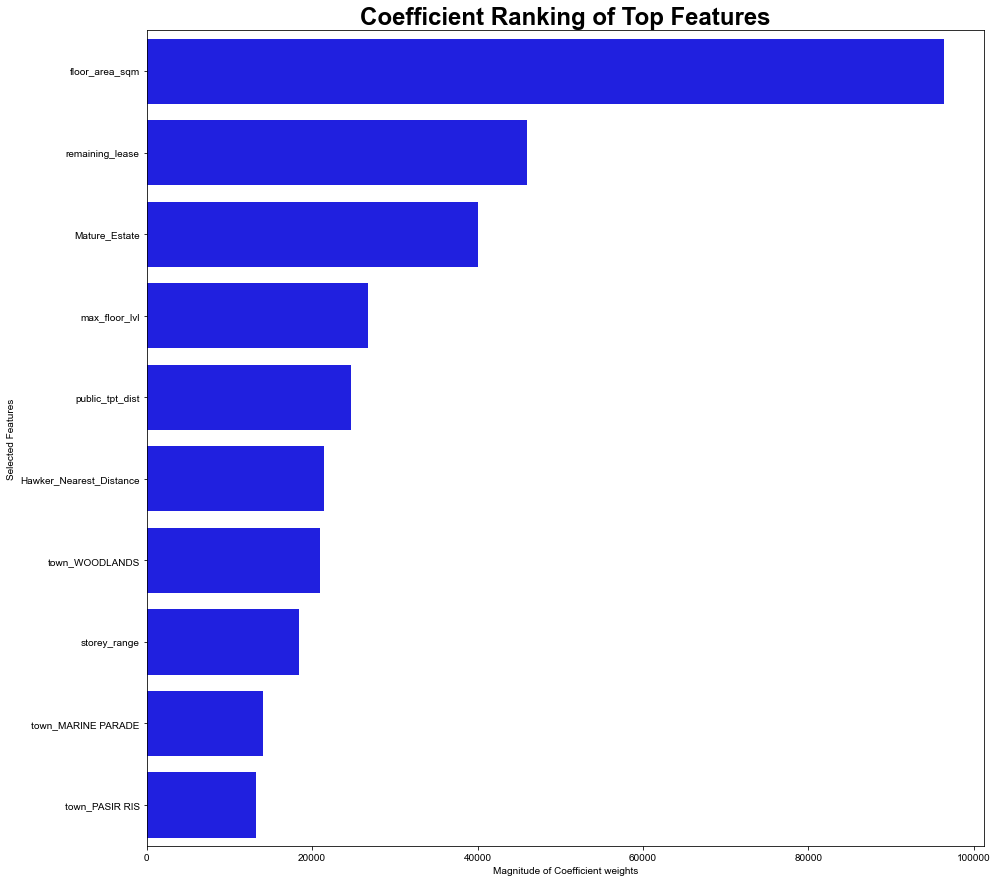

In [94]:
# Create a dataframe of feature importance
plt.figure(figsize=(15, 15))
df2 = pd.DataFrame({'Col1': np.abs(lr.coef_), 'Col2': X1.columns})

# Sort the dataframe by feature importance in descending order
importance = df2.sort_values(by='Col1', ascending=False).head(10)

sns.barplot(data=importance, x='Col1', y='Col2', orient='h', color='blue')
plt.title('Coefficient Ranking of Top Features', fontweight='bold')
plt.xlabel("Magnitude of Coefficient weights")
plt.ylabel("Selected Features")
plt.show()

The above bar plot shows the significance of each feature used in the Linear Regression Modelling. The top variables contribute more weights into forecasting the resale price of HDB flats, hence they have stronger predictive power. According to the plot, we can see that the top 3 variables are **floor area**, **Mature Estate** and **Number of Remaining Lease years** of the HDB resale flats. This supports our claim that potential HDB buyers will look into these features when they are deciding to purchase a resale flat

## *Predict test data*

The test dataset will be cleaned and pre-processed in the same manner as shown in part 1 of the code notebook in order to have it organised in the designated format for prediction on unseen data at the Kaggle platform

In [96]:
test = pd.read_csv('../datasets/test.csv')
test.shape

(16737, 77)

In [97]:
test.isnull().sum().sort_values(ascending=False).head(10)

Hawker_Within_500m       10755
Mall_Within_500m         10292
Hawker_Within_1km         6729
Hawker_Within_2km         3254
Mall_Within_1km           2786
Mall_Within_2km            213
Mall_Nearest_Distance       84
mrt_name                     0
mrt_nearest_distance         0
hawker_market_stalls         0
dtype: int64

In [98]:
#Impute missing values with mean in order to maintain shape of dataset for kaggle prediction
mall_dist = test['Mall_Nearest_Distance'].mean()
test['Mall_Nearest_Distance'] = dummy_test['Mall_Nearest_Distance'].fillna(mall_dist)

In [99]:
test.dropna(subset=['Mall_Nearest_Distance'], inplace=True)

In [100]:
test.shape

(16737, 77)

In [101]:
#Impute zeroes to all hawker centers/malls radial threshold distance with missing values similar to train dataset
test['Hawker_Within_500m'] = test['Hawker_Within_500m'].fillna(0.0)
test['Hawker_Within_1km'] = test['Hawker_Within_1km'].fillna(0.0)
test['Hawker_Within_2km'] = test['Hawker_Within_2km'].fillna(0.0)
test['Mall_Within_1km'] = test['Mall_Within_1km'].fillna(0.0)
test['Mall_Within_2km'] = test['Mall_Within_2km'].fillna(0.0)
test['Mall_Within_500m'] = test['Mall_Within_500m'].fillna(0.0)

## Feature engineering

In [102]:
# create a dictionary of unique index values similar to train dataset
unique_val = sorted(test['storey_range'].unique())
storey_dict = {val: k for k, val in enumerate(unique_val)}

# map the column to the dictionary
test['storey_range'] = test['storey_range'].map(storey_dict)

In [103]:
#custom function to map the different towns based on whether they are mature estates or not
def estate(row):
    town_list = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 
                 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 
                 'TAMPINES', 'TOA PAYOH']
    if row in town_list:
        return 1
    else:
        return 0
        
test['Mature_Estate'] = test['town'].apply(estate)

In [104]:
#Create new features from existing variables to improve the modelling process
#remaining_lease: Number of remaining lease years of the flat
#amenities_within_2km: Combined malls and hawker centers within 2km radius
#public_tpt_dis: Average distance to nearest public transport
test['remaining_lease'] = test['lease_commence_date'] + 99 - test['Tranc_Year']
test['amenities_within_2km'] = test['Mall_Within_2km'] + test['Hawker_Within_2km']
test['public_tpt_dist'] = (test['mrt_nearest_distance'] + test['bus_stop_nearest_distance']) / 2

In [106]:
#Pass in selected features for modelling, one-hot encode categorial ones and drop redundant columns
test1 = test[['remaining_lease', 'max_floor_lvl', '3room_sold', 'floor_area_sqm', 'storey_range', '5room_sold', 
                          'exec_sold', 'Mature_Estate', 'public_tpt_dist', 'amenities_within_2km', 
                          'total_dwelling_units', 'Hawker_Nearest_Distance', 'full_flat_type', 'town', 'Mall_Nearest_Distance', '2room_sold']]
ohe1 = pd.get_dummies(test1[['full_flat_type', 'town']], drop_first=True)
df1 = pd.concat([test1, ohe1], axis=1)
df1.drop(columns=['full_flat_type', 'town'], inplace=True)

### Final Data cleaning for predictions

In [107]:
df1.columns

Index(['remaining_lease', 'max_floor_lvl', '3room_sold', 'floor_area_sqm',
       'storey_range', '5room_sold', 'exec_sold', 'Mature_Estate',
       'public_tpt_dist', 'amenities_within_2km', 'total_dwelling_units',
       'Hawker_Nearest_Distance', 'Mall_Nearest_Distance', '2room_sold',
       'full_flat_type_2 ROOM Improved', 'full_flat_type_2 ROOM Model A',
       'full_flat_type_2 ROOM Premium Apartment',
       'full_flat_type_2 ROOM Standard', 'full_flat_type_3 ROOM DBSS',
       'full_flat_type_3 ROOM Improved', 'full_flat_type_3 ROOM Model A',
       'full_flat_type_3 ROOM New Generation',
       'full_flat_type_3 ROOM Premium Apartment',
       'full_flat_type_3 ROOM Simplified', 'full_flat_type_3 ROOM Standard',
       'full_flat_type_3 ROOM Terrace', 'full_flat_type_4 ROOM Adjoined flat',
       'full_flat_type_4 ROOM DBSS', 'full_flat_type_4 ROOM Improved',
       'full_flat_type_4 ROOM Model A', 'full_flat_type_4 ROOM Model A2',
       'full_flat_type_4 ROOM New Generation

In [108]:
#Pass in confirmed column features for prediction
#final_df = df2
final_df = df1[features]
final_df.columns

Index(['floor_area_sqm', 'remaining_lease', 'Mature_Estate', 'max_floor_lvl',
       'storey_range', 'town_MARINE PARADE', 'town_BISHAN', 'town_BUKIT MERAH',
       'full_flat_type_EXECUTIVE Maisonette', 'town_QUEENSTOWN',
       'full_flat_type_5 ROOM DBSS', 'full_flat_type_3 ROOM Terrace',
       'town_PUNGGOL', 'town_BUKIT TIMAH', 'amenities_within_2km',
       'town_BEDOK', '2room_sold', '5room_sold', 'total_dwelling_units',
       'town_JURONG WEST', 'Mall_Nearest_Distance', 'town_BUKIT PANJANG',
       'town_CHOA CHU KANG', 'full_flat_type_4 ROOM Model A', 'town_TAMPINES',
       'town_SEMBAWANG', 'town_PASIR RIS', 'town_WOODLANDS',
       'Hawker_Nearest_Distance', 'public_tpt_dist'],
      dtype='object')

In [109]:
final_df.dtypes

floor_area_sqm                         float64
remaining_lease                          int64
Mature_Estate                            int64
max_floor_lvl                            int64
storey_range                             int64
town_MARINE PARADE                       uint8
town_BISHAN                              uint8
town_BUKIT MERAH                         uint8
full_flat_type_EXECUTIVE Maisonette      uint8
town_QUEENSTOWN                          uint8
full_flat_type_5 ROOM DBSS               uint8
full_flat_type_3 ROOM Terrace            uint8
town_PUNGGOL                             uint8
town_BUKIT TIMAH                         uint8
amenities_within_2km                   float64
town_BEDOK                               uint8
2room_sold                               int64
5room_sold                               int64
total_dwelling_units                     int64
town_JURONG WEST                         uint8
Mall_Nearest_Distance                  float64
town_BUKIT PA

In [110]:
X1.columns

Index(['floor_area_sqm', 'remaining_lease', 'Mature_Estate', 'max_floor_lvl',
       'storey_range', 'town_MARINE PARADE', 'town_BISHAN', 'town_BUKIT MERAH',
       'full_flat_type_EXECUTIVE Maisonette', 'town_QUEENSTOWN',
       'full_flat_type_5 ROOM DBSS', 'full_flat_type_3 ROOM Terrace',
       'town_PUNGGOL', 'town_BUKIT TIMAH', 'amenities_within_2km',
       'town_BEDOK', '2room_sold', '5room_sold', 'total_dwelling_units',
       'town_JURONG WEST', 'Mall_Nearest_Distance', 'town_BUKIT PANJANG',
       'town_CHOA CHU KANG', 'full_flat_type_4 ROOM Model A', 'town_TAMPINES',
       'town_SEMBAWANG', 'town_PASIR RIS', 'town_WOODLANDS',
       'Hawker_Nearest_Distance', 'public_tpt_dist'],
      dtype='object')

In [111]:
#Scale confirmed column features for prediction
scaled_pred = ss.transform(final_df)
scaled_pred.shape

(16737, 30)

In [112]:
X1.shape

(149805, 30)

In [113]:
#Predict resale prices based on final model
dummy_price = lr.predict(scaled_pred)
dummy_price[:5]

array([370006.77649275, 512373.92597072, 371330.6265288 , 258594.17463549,
       458429.39761729])

In [114]:
dummy_set = pd.DataFrame({'Id': dummy_test['id'], 'Predicted': dummy_price})
dummy_set.to_csv('../datasets/final_pred_FE_30features.csv', index=False)

## Conclusion

In summary, we have sucessfully managed to successfully construct a Linear Regression model that is capable of predicting the HDB resale prices in Singapore through the selection of key features that can potentially influence the the target output. Beginning with importing the necessary libraries and cleaning the data, we were able to conduct several key analysis at the exploratory data analysis stage where important features that can impact the HDB resale price were identified and analysed. Thereafter, new features were engineered relative to the existing ones that were found to have certain degree of linearity with regards to the target price variable. These features were eventually selected and compiled into a final dataset which was passed in for Linear Regression modelling, as well as optimising the key variables through Lasso and Ridge regularization to determine the final set of useful features for predicting the HDB resale price. By running through this model workflow, we have managed to achieve and **RMSE** of **51814** for our Linear Regression Model. With this chain of thought, we have als understood the important features that can contribute in determining the final price of a HDB resale flat, where our clients can tap upon on to devise a range of prices when advertising for their property. This will allow them to reap better sale profits and commisions in the property market, as well as assist buyers in determining the correct price range when purchasing a desired type of property in the market.

## Recommendations

The results from the newly built machine learning model by Linear Regression have successfully proven that our top key predictors are what clients tend to look out for when considering to purchase a resale flat, as they can significantly affect the final sale price of HDB resale flats in Singapore. In spite of this successful outcome on our first prototype model, we can definitely look into further analysis and research to improve the predictive power of the finalised model for deployment to production. Some of these examples include:

1. Experimenting using other advanced regression techniques such Random Forest, Gradient Boosting regression techniques. Linear Regression is a machine learning model which is highly reliant on using features with strong correlation to predict the resale price accurately. Therefore, it will pale in comparison to these tree-based regression techniques that are more robust in handling features with weaker correlations. Hence, we should definitely research and incorporate them so as to further analyse if they will have any impact on the final resale price

2. As there are many available sub-features in the various categorial groups, further in-depth analysis could be done by breaking down to the different attributes surrounding the flat types/flat models where seperate models can be constructed to predict the prices of each type for property and housing agents to tap on, as the resale prices of these different flats might be affected by the different features individually

3. Lastly, we can explore other features that potential buyers could take into consideration also, such as the property's proximity to the Central Business District(CBD) area of Singapore, nature parks, as well as other recreational ammenities that could plausibly affect the overall HDB resale price in the market.

## Sources

1. https://myestate.sg/news/view/68
2. https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/
3. https://towardsdatascience.com/a-practical-introduction-to-9-regression-algorithms-389057f86eb9